In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as s

In [2]:
data = pd.read_csv("C:/Users/Sneha Gupta/Downloads/shopping_trends.csv")
print(data)

      Customer ID  Age  Gender Item Purchased     Category  \
0               1   55    Male         Blouse     Clothing   
1               2   19    Male        Sweater     Clothing   
2               3   50    Male          Jeans     Clothing   
3               4   21    Male        Sandals     Footwear   
4               5   45    Male         Blouse     Clothing   
...           ...  ...     ...            ...          ...   
3895         3896   40  Female         Hoodie     Clothing   
3896         3897   52  Female       Backpack  Accessories   
3897         3898   46  Female           Belt  Accessories   
3898         3899   44  Female          Shoes     Footwear   
3899         3900   52  Female        Handbag  Accessories   

      Purchase Amount (USD)       Location Size      Color  Season  \
0                        53       Kentucky    L       Gray  Winter   
1                        64          Maine    L     Maroon  Winter   
2                        73  Massachusetts   

In [3]:
#1. What is the overall distribution of customer ages in the dataset?
data["Age"].value_counts()

Age
69    88
57    87
41    86
25    85
49    84
54    83
27    83
50    83
62    83
32    82
58    81
19    81
42    80
31    79
28    79
43    79
37    77
29    76
46    76
63    75
59    75
68    75
56    74
36    74
52    73
64    73
55    73
51    72
65    72
45    72
40    72
35    72
47    71
66    71
30    71
23    71
53    70
38    70
18    69
26    69
21    69
34    68
39    68
48    68
24    68
70    67
22    66
61    65
60    65
33    63
20    62
67    54
44    51
Name: count, dtype: int64

In [4]:
data["Age_category"] = pd.cut(data["Age"],bins= [0,15,30,50,70],labels = ["child","teen", " young adult","old" ])
print(data["Age_category"])

0                old
1               teen
2        young adult
3               teen
4        young adult
            ...     
3895     young adult
3896             old
3897     young adult
3898     young adult
3899             old
Name: Age_category, Length: 3900, dtype: category
Categories (4, object): ['child' < 'teen' < ' young adult' < 'old']


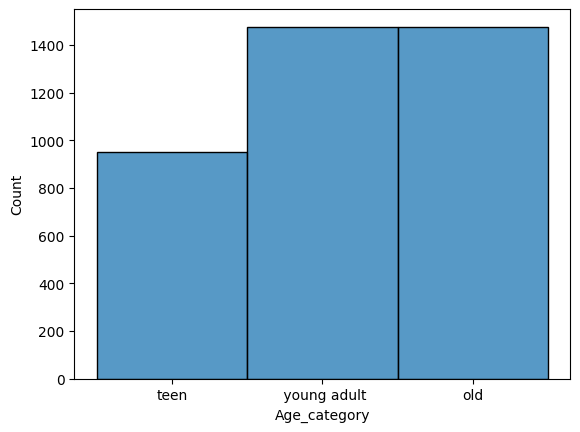

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as s
data = pd.read_csv("C:/Users/Sneha Gupta/Downloads/shopping_trends.csv")
data["Age_category"] = pd.cut(data["Age"],bins= [0,15,30,50,70],labels = ["child","teen", " young adult","old" ])

s.histplot(data,x="Age_category")
plt.show()

In [6]:
#how does the average purchase amount varyb across different product categories
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns

data = pd.read_csv("C:/Users/Sneha Gupta/Downloads/shopping_trends.csv")


print(data.columns)
#Index(['Customer ID','Age','Gender','Item Purchased','Category','Purchase Amount (USD)','Location','Size','Color','Season','Review Rating','Subscription Status','shipping type','Discount Applied','Promo Code Used','Previous Purchase','Payment Method','Frequency of purchase','Age Category'],dtype='object')
data['Category'].unique()
data.groupby('Category')['Purchase Amount (USD)'].mean()

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Payment Method',
       'Shipping Type', 'Discount Applied', 'Promo Code Used',
       'Previous Purchases', 'Preferred Payment Method',
       'Frequency of Purchases'],
      dtype='object')


Category
Accessories    59.838710
Clothing       60.025331
Footwear       60.255426
Outerwear      57.172840
Name: Purchase Amount (USD), dtype: float64

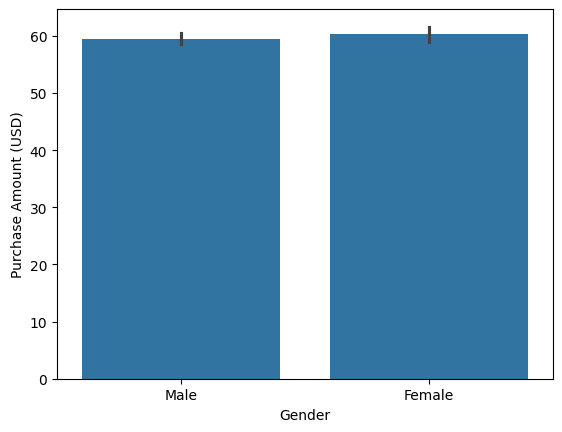

In [7]:
#which gender has the highest number of purchases?
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns

data = pd.read_csv("C:/Users/Sneha Gupta/Downloads/shopping_trends.csv")
data.columns
sns.barplot(data, x = "Gender",y="Purchase Amount (USD)")
plt.show()

In [8]:
#what are the most commonly purchased items in each category
data.groupby('Category')['Item Purchased'].value_counts()


Category     Item Purchased
Accessories  Jewelry           171
             Belt              161
             Sunglasses        161
             Scarf             157
             Hat               154
             Handbag           153
             Backpack          143
             Gloves            140
Clothing     Blouse            171
             Pants             171
             Shirt             169
             Dress             166
             Sweater           164
             Socks             159
             Skirt             158
             Shorts            157
             Hoodie            151
             T-shirt           147
             Jeans             124
Footwear     Sandals           160
             Shoes             150
             Sneakers          145
             Boots             144
Outerwear    Jacket            163
             Coat              161
Name: count, dtype: int64

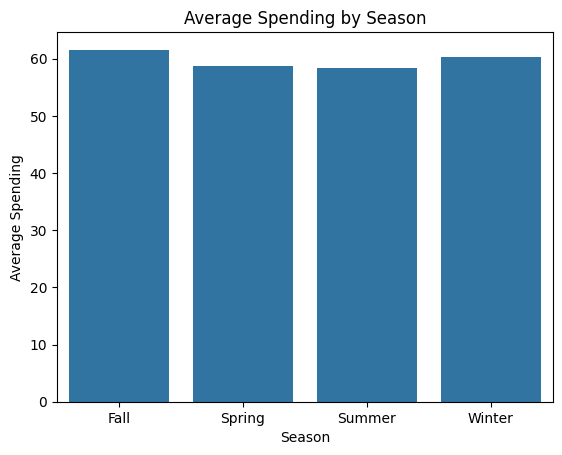

In [9]:
#Are there any specific seasons or months where customer spending is significantly higher?
seasonal_spending = data.groupby('Season')['Purchase Amount (USD)'].mean()

sns.barplot(x=seasonal_spending.index, y=seasonal_spending.values)
plt.title("Average Spending by Season")
plt.xlabel("Season")
plt.ylabel("Average Spending")
plt.show()


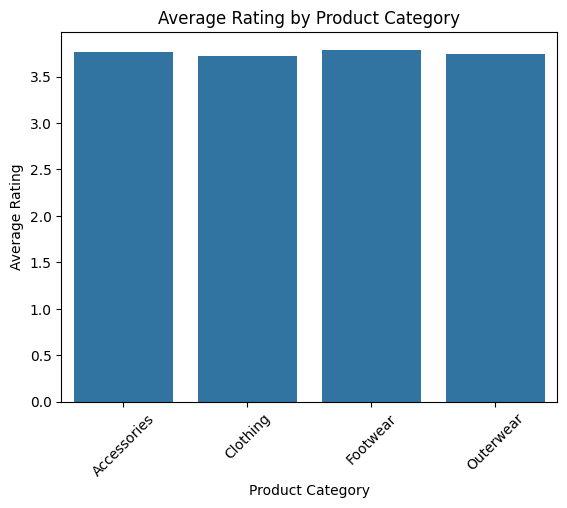

In [10]:
#What is the average rating given by customers for each product category?
average_ratings = data.groupby('Category')['Review Rating'].mean()

sns.barplot(x=average_ratings.index, y=average_ratings.values)
plt.title("Average Rating by Product Category")
plt.xlabel("Product Category")
plt.ylabel("Average Rating")
plt.xticks(rotation=45)
plt.show()

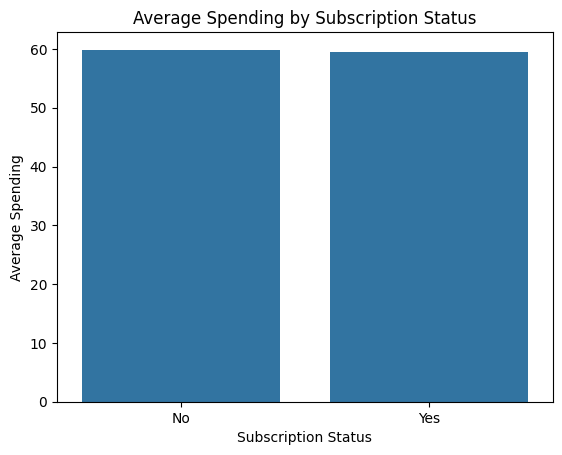

In [11]:
#Are there any notable differences in purchase behavior between subscribed and non-subscribed customers?
subscribed_spending = data.groupby('Subscription Status')['Purchase Amount (USD)'].mean()

sns.barplot(x=subscribed_spending.index, y=subscribed_spending.values)
plt.title("Average Spending by Subscription Status")
plt.xlabel("Subscription Status")
plt.ylabel("Average Spending")
plt.show()

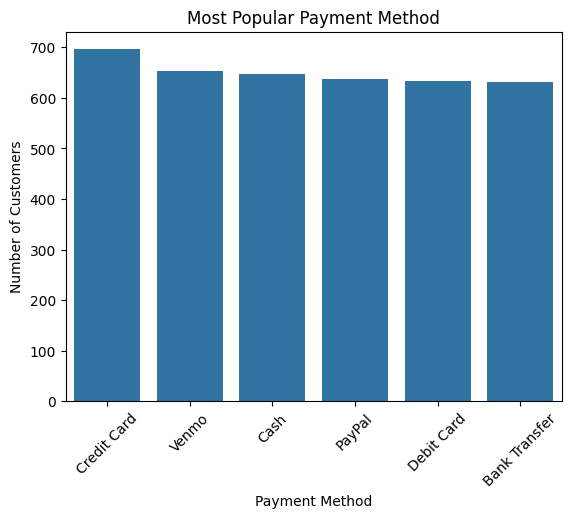

In [12]:
#Which payment method is the most popular among customers?
payment_method_counts = data['Payment Method'].value_counts()

sns.barplot(x=payment_method_counts.index, y=payment_method_counts.values)
plt.title("Most Popular Payment Method")
plt.xlabel("Payment Method")
plt.ylabel("Number of Customers")
plt.xticks(rotation=45)
plt.show()

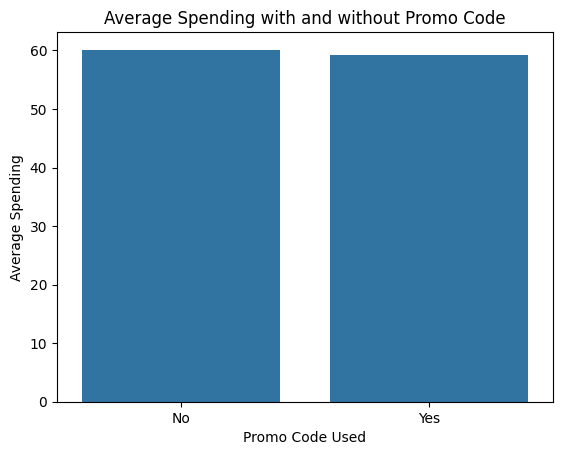

In [13]:
#Do customers who use promo codes tend to spend more than those who don't?
promo_spending = data.groupby('Promo Code Used')['Purchase Amount (USD)'].mean()

sns.barplot(x=promo_spending.index, y=promo_spending.values)
plt.title("Average Spending with and without Promo Code")
plt.xlabel("Promo Code Used")
plt.ylabel("Average Spending")
plt.show()

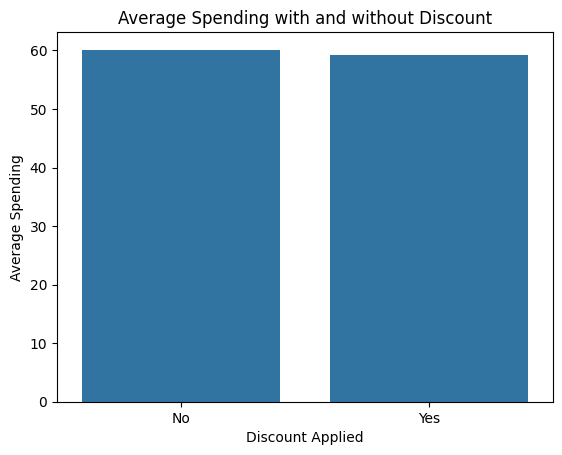

In [14]:
#How does the presence of a discount affect the purchase decision of customers?
discount_spending = data.groupby('Discount Applied')['Purchase Amount (USD)'].mean()

sns.barplot(x=discount_spending.index, y=discount_spending.values)
plt.title("Average Spending with and without Discount")
plt.xlabel("Discount Applied")
plt.ylabel("Average Spending")
plt.show()

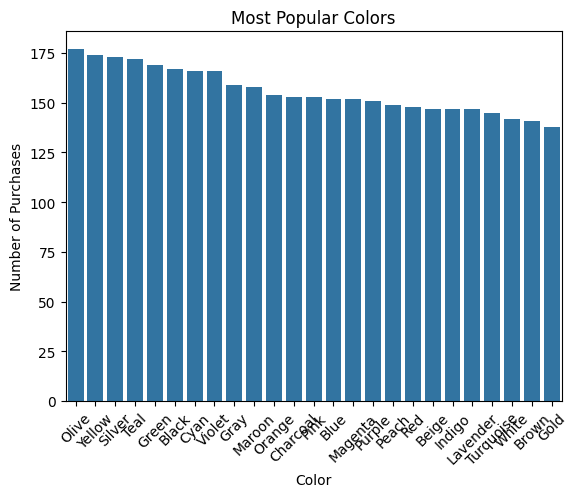

In [15]:
#Are there any specific colors that are more popular among customers?
color_counts = data['Color'].value_counts()

sns.barplot(x=color_counts.index, y=color_counts.values)
plt.title("Most Popular Colors")
plt.xlabel("Color")
plt.ylabel("Number of Purchases")
plt.xticks(rotation=45)
plt.show()

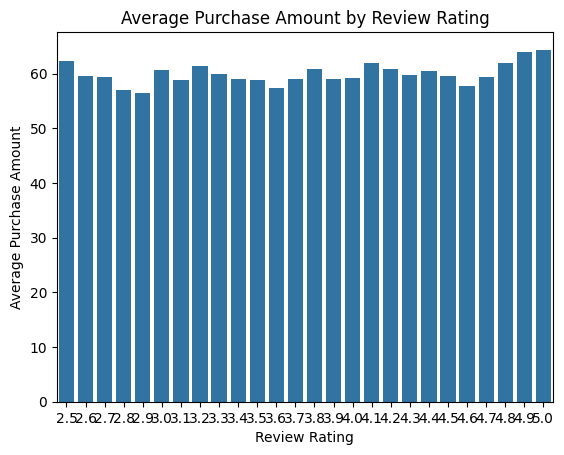

In [17]:
#How does the purchase amount differ based on the review ratings given by customers?
purchase_by_rating = data.groupby('Review Rating')['Purchase Amount (USD)'].mean()

sns.barplot(x=purchase_by_rating.index, y=purchase_by_rating.values)
plt.title("Average Purchase Amount by Review Rating")
plt.xlabel("Review Rating")
plt.ylabel("Average Purchase Amount")
plt.show()

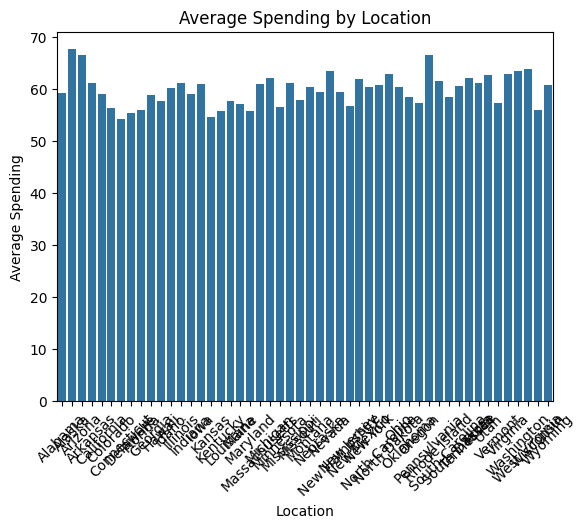

In [18]:
#Are there any noticeable differences in purchase behavior between different locations?
location_spending = data.groupby('Location')['Purchase Amount (USD)'].mean()

sns.barplot(x=location_spending.index, y=location_spending.values)
plt.title("Average Spending by Location")
plt.xlabel("Location")
plt.ylabel("Average Spending")
plt.xticks(rotation=45)
plt.show()

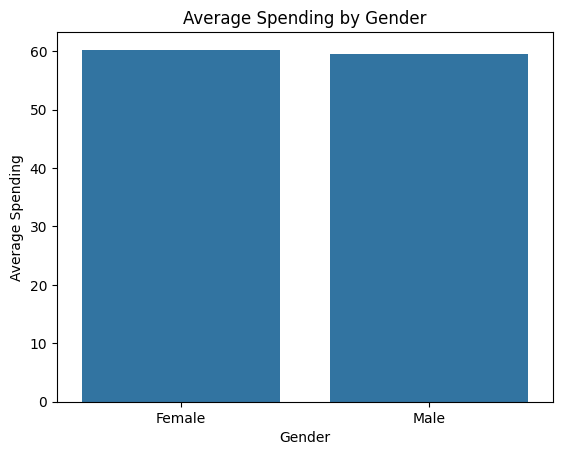

In [19]:
#How does the average purchase amount differ between male and female customers?
gender_spending = data.groupby('Gender')['Purchase Amount (USD)'].mean()

sns.barplot(x=gender_spending.index, y=gender_spending.values)
plt.title("Average Spending by Gender")
plt.xlabel("Gender")
plt.ylabel("Average Spending")
plt.show()